In [13]:
import datetime, time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output, display, HTML

In [14]:
train = pd.read_csv("/Users/a1/Desktop/big data final/new/train_preprocessed_new.csv")
test = pd.read_csv("/Users/a1/Desktop/big data final/new/test_preprocessed_new.csv")
all_data = pd.read_csv("/Users/a1/Desktop/big data final/new/all_data_preprocessed_new.csv")

In [15]:
train_X = train.loc[:, train.columns != 'totals.totalTransactionRevenue']
train_y = np.log1p(train['totals.totalTransactionRevenue'])
test_X = test.loc[:, test.columns != 'totals.totalTransactionRevenue']
test_y = np.log1p(test['totals.totalTransactionRevenue'])
all_data_X = all_data.loc[:, all_data.columns != 'totals.totalTransactionRevenue']
all_data_y = np.log1p(all_data['totals.totalTransactionRevenue'])

In [16]:
parameters = {
    'n_estimators': [est for est in range(2, 11, 2)],
    'max_depth': [depth for depth in range(2, 21, 2)],
    'min_samples_split': [min_samples for min_samples in range(200, 2001, 200)]
}

for key, values in parameters.items():
    print(key," - ", values)

n_estimators  -  [2, 4, 6, 8, 10]
max_depth  -  [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
min_samples_split  -  [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]


In [17]:
start = time.time()

gridSearchResult = GridSearchCV(RandomForestRegressor(random_state = 0),
                                parameters, 
                                cv=5, 
                                scoring='neg_mean_squared_error', 
                                verbose=5
                               ).fit(all_data_X, all_data_y)
clear_output()
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

Time Taken: 00:23:22.605


In [18]:
# Show all results
results_df = pd.DataFrame.from_dict(gridSearchResult.cv_results_)
results_df.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
mean_fit_time,0.219825,0.363407,0.572146,0.697884,0.885248,0.200766,0.374407,0.561786,0.905213,0.981722,...,0.245989,0.468018,0.754307,0.98943,1.07703,0.225225,0.446912,0.529458,0.734524,0.9698
std_fit_time,0.0326292,0.0174341,0.033408,0.0119334,0.0914469,0.00279234,0.0226121,0.0476361,0.122496,0.113255,...,0.0485405,0.0725543,0.118261,0.119269,0.179246,0.00685671,0.143787,0.038162,0.0760354,0.111564
mean_score_time,0.00644202,0.00579848,0.00721197,0.00706553,0.00728464,0.00633559,0.00627408,0.00672784,0.00796704,0.00994878,...,0.00734019,0.00907683,0.0139641,0.00992436,0.00888906,0.00695786,0.00631361,0.00632572,0.00752778,0.00863199
std_score_time,0.00156365,0.000403423,0.00108419,0.000551923,0.000533676,0.000862564,0.000600564,0.000587686,0.00210836,0.00325347,...,0.00385079,0.00356549,0.00767089,0.00409829,0.00261448,0.00195825,0.00101642,0.000382933,0.00207279,0.00224462
param_max_depth,2,2,2,2,2,2,2,2,2,2,...,20,20,20,20,20,20,20,20,20,20
param_min_samples_split,200,200,200,200,200,400,400,400,400,400,...,1800,1800,1800,1800,1800,2000,2000,2000,2000,2000
param_n_estimators,2,4,6,8,10,2,4,6,8,10,...,2,4,6,8,10,2,4,6,8,10
params,"{'max_depth': 2, 'min_samples_split': 200, 'n_...","{'max_depth': 2, 'min_samples_split': 200, 'n_...","{'max_depth': 2, 'min_samples_split': 200, 'n_...","{'max_depth': 2, 'min_samples_split': 200, 'n_...","{'max_depth': 2, 'min_samples_split': 200, 'n_...","{'max_depth': 2, 'min_samples_split': 400, 'n_...","{'max_depth': 2, 'min_samples_split': 400, 'n_...","{'max_depth': 2, 'min_samples_split': 400, 'n_...","{'max_depth': 2, 'min_samples_split': 400, 'n_...","{'max_depth': 2, 'min_samples_split': 400, 'n_...",...,"{'max_depth': 20, 'min_samples_split': 1800, '...","{'max_depth': 20, 'min_samples_split': 1800, '...","{'max_depth': 20, 'min_samples_split': 1800, '...","{'max_depth': 20, 'min_samples_split': 1800, '...","{'max_depth': 20, 'min_samples_split': 1800, '...","{'max_depth': 20, 'min_samples_split': 2000, '...","{'max_depth': 20, 'min_samples_split': 2000, '...","{'max_depth': 20, 'min_samples_split': 2000, '...","{'max_depth': 20, 'min_samples_split': 2000, '...","{'max_depth': 20, 'min_samples_split': 2000, '..."
split0_test_score,-0.00449257,-0.00438928,-0.00437864,-0.00438206,-0.00436521,-0.00449257,-0.00438928,-0.00437864,-0.00438206,-0.00436521,...,-0.0129661,-0.0129574,-0.0129739,-0.0129718,-0.0129759,-0.0129661,-0.0129574,-0.0129739,-0.0129718,-0.0129759
split1_test_score,-0.00402939,-0.00393969,-0.00394424,-0.00393521,-0.00392906,-0.00402939,-0.00393969,-0.00394424,-0.00393521,-0.00392906,...,-0.0108704,-0.0108817,-0.0108693,-0.0108712,-0.0108675,-0.0108704,-0.0108817,-0.0108693,-0.0108712,-0.0108675


In [19]:
# Results with rank 1
rank_one = results_df[results_df['rank_test_score'] == 1][['params', 'mean_fit_time',  'mean_test_score', 'std_test_score']]
rank_one = pd.concat([rank_one['params'].apply(pd.Series), rank_one], axis = 1, sort=True).drop(columns = 'params')
rank_one.T

,103,153,203,253,303,353,403,453
max_depth,6.000000,8.000000,10.000000,12.000000,14.000000,16.000000,18.000000,20.000000
min_samples_split,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
n_estimators,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean_fit_time,0.648326,0.692169,0.697234,0.667807,0.669357,0.640441,0.756798,0.762307
mean_test_score,-0.000904,-0.000904,-0.000904,-0.000904,-0.000904,-0.000904,-0.000904,-0.000904
std_test_score,0.000267,0.000267,0.000267,0.000267,0.000267,0.000267,0.000267,0.000267


In [20]:
gridSearchResult.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=200,
                      min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
start = time.time()

model = gridSearchResult.best_estimator_.fit(train_X, train_y)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
time_taken = "{:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds)

In [22]:
predictions = pd.Series(model.predict(test_X))

In [23]:
print("Mean Squared Error:", (mean_squared_error(test_y, predictions))**0.5)
print("Time Taken to Fit:", time_taken)

Mean Squared Error: 0.019198176719672874
Time Taken to Fit: 00:00:0.729


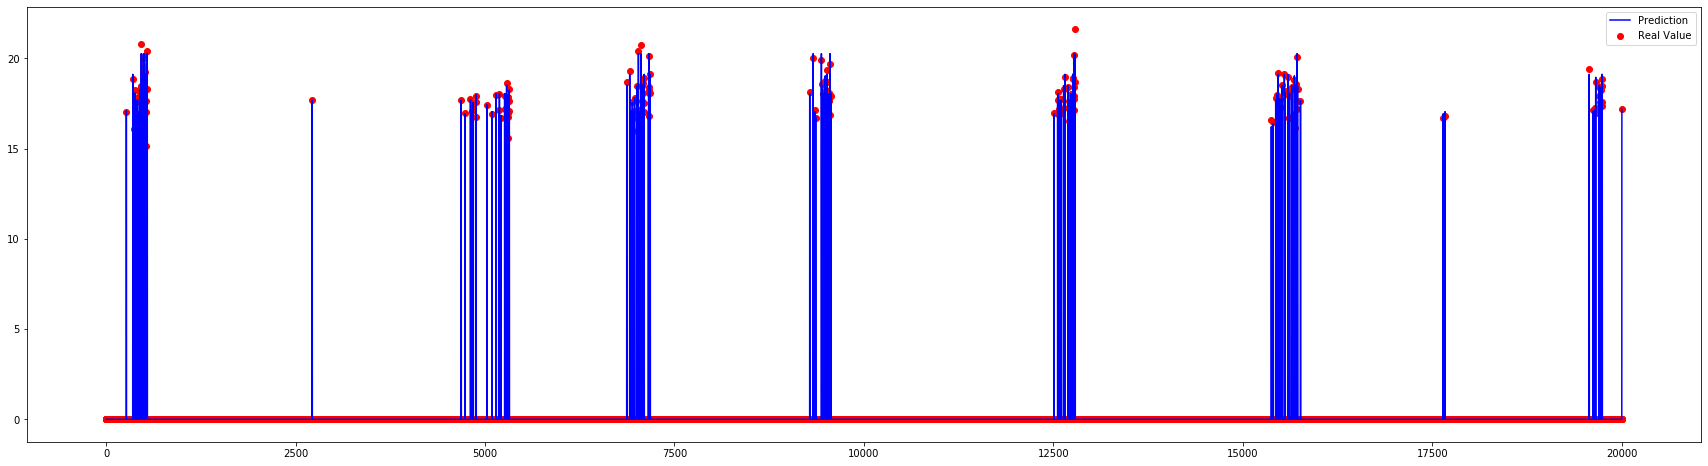

In [24]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()
